In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import sklearn
from scipy.stats.stats import pearsonr
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from scipy.spatial.distance import pdist, squareform
from IPython.display import display, HTML
import matplotlib.patches as mpatches
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
%matplotlib inline

In [2]:
songs = pd.read_csv("/Users/piyushkhemka/Desktop/mm-songs-db-tools-master/vis.csv")
songs.head()

,track_id,title,song_id,release,artist_id,artist_name,duration,artist_familiarity,artist_hotttnesss,year,...,mode,mode_confidence,song_hotttnesss,start_of_fade_out,tempo,time_signature,time_signature_confidence,artist_latitude,artist_location,artist_longitude
0,TRAAAAW128F429D538,I Didn't Mean To,SOMZWCG12A8C13C480,Fear Itself,ARD7TVE1187B99BFB1,Casual,218.93179,0.581794,0.401998,0,...,0,0.636,0.602120,218.932,92.198,4,0.778,NaN,California - LA,NaN
1,TRAAABD128F429CF47,Soul Deep,SOCIWDW12A8C13D406,Dimensions,ARMJAGH1187FB546F3,The Box Tops,148.03546,0.630630,0.417500,1969,...,0,0.430,NaN,137.915,121.274,4,0.384,35.14968,"Memphis, TN",-90.04892
2,TRAAADZ128F9348C2E,Amor De Cabaret,SOXVLOJ12AB0189215,Las Numero 1 De La Sonora Santanera,ARKRRTF1187B9984DA,Sonora Santanera,177.47546,0.487357,0.343428,0,...,1,0.565,NaN,172.304,100.070,1,0.000,NaN,NaN,NaN
3,TRAAAEF128F4273421,Something Girls,SONHOTT12A8C13493C,Friend Or Foe,AR7G5I41187FB4CE6C,Adam Ant,233.40363,0.630382,0.454231,1982,...,1,0.749,NaN,217.124,119.293,4,0.000,NaN,"London, England",NaN
4,TRAAAFD128F92F423A,Face the Ashes,SOFSOCN12A8C143F5D,Muertos Vivos,ARXR32B1187FB57099,Gob,209.60608,0.651046,0.401724,2007,...,1,0.371,0.604501,198.699,129.738,4,0.562,NaN,NaN,NaN


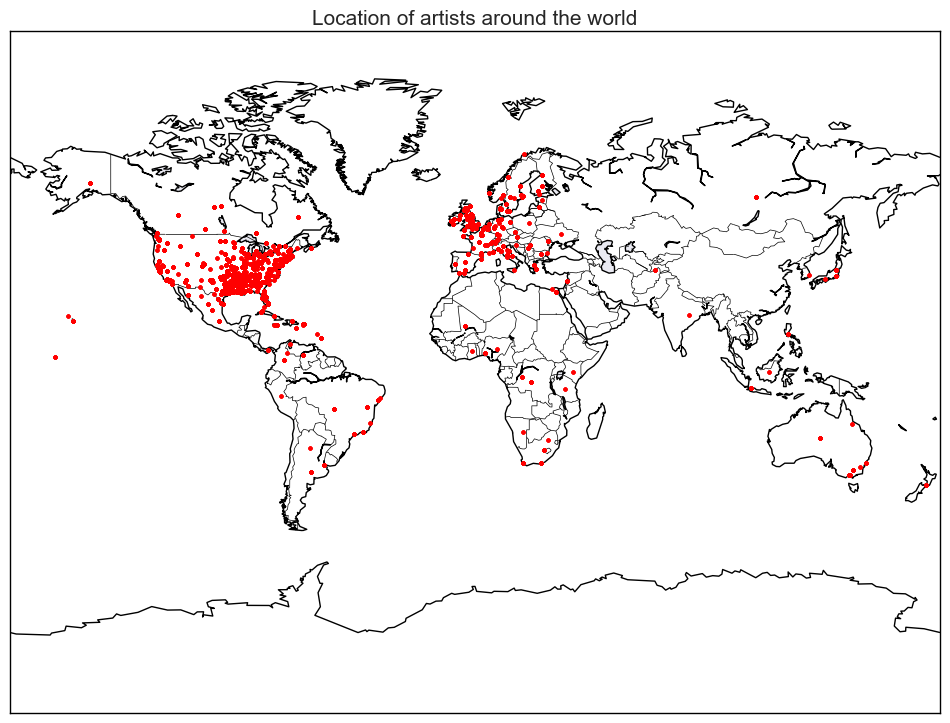

In [3]:
latindegrees = songs["artist_latitude"].dropna()
lonindegrees = songs["artist_longitude"].dropna()
lat = []
lon = []
for x in latindegrees:
    lat.append(x)
for y in lonindegrees:
    lon.append(y)    

fig = plt.figure(figsize=(12,12))
m = Basemap(projection='mill',llcrnrlat=-90,urcrnrlat=90,llcrnrlon=-180,urcrnrlon=180,resolution='c')
m.drawcoastlines()
m.drawcountries()
m.fillcontinents(color="white")
m.drawmapboundary(fill_color="white")
x,y = m(lon,lat)
m.plot(x, y,'ro', markersize=3)
plt.title("Location of artists around the world",fontsize=15)
plt.savefig("locationofartists1.png")

In [4]:
latindegrees

1        35.14968
10       35.21962
15       43.64856
16       37.16793
20       34.31109
21       38.89910
22       49.80388
23       40.82624
24       37.83721
27       32.67828
28       40.79195
29       40.73197
30       41.88415
31       27.94017
32       40.70380
33       30.08615
36       29.42449
40       34.05349
41       42.33168
42       51.50632
44       35.91463
45       34.36401
46       32.77815
49       52.51607
51      -23.56287
53       34.05349
57       51.50632
58       54.48303
60       37.77916
62      -37.81753
           ...   
39923    54.69040
39924    36.06899
39931    31.90143
39933    38.62774
39935    27.94017
39938    41.26069
39939   -10.68641
39945    37.59791
39947    46.53338
39952    35.99527
39953    18.11526
39959    32.29869
39962    42.35190
39963    35.83073
39964    32.67828
39965     7.37884
39967    34.05349
39968    33.53584
39969    35.14968
39975    38.62774
39983    27.97580
39985    38.99792
39987    31.19224
39988    39.75911
39990    3